In [1]:
import os
print(os.getcwd())


/Users/hediderbel/Desktop/Benchmark_TDA 


In [1]:
import pandas as pd
import numpy as np 
import gudhi as gd
from ML_pipeline_forth_test import ML_pipeline
from quantile_filtration import quantile 
from scipy.spatial import distance_matrix
import random
import matplotlib.pyplot as plt
from DatasetGeneration import generate_data_clouds
from ML_pipeline_forth_test import ML_pipeline
import itertools
import time
from measure_time_memory import measure_time_memory
import numpy as np
from fit_model import launch_benchmark
from persistence_time_and_memory import run_the_process
import pandas as pd 
from time_usage import measure_time
import random
import gudhi as gd
from persistence_time_and_memory import run_the_process
from build_complex import build_complex

In [2]:
points_for_cloud=1000
num_diag_per_class=15
#r_values=[3, 3.5, 4]g
r_values=[2.5,3.5,4,4.1,4.3]

points,labels,quantile=generate_data_clouds(points_for_cloud,num_diag_per_class,r_values)
print(quantile)

[0.18898232 0.28267472 0.36284088 0.43802239 0.51098901 0.58396598
 0.65973678 0.74406404 0.85005141]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


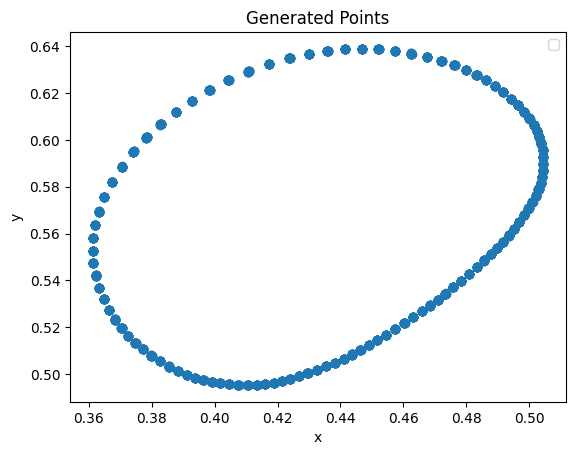

In [4]:
X=points[53]
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Points')
plt.legend()
plt.show()

In [5]:
complex_alpha_params =  {
    'complex_type': ['rips'],
    'max_dimension': [2],
    'sparse': [None],
    'max_edge_length': [quantile[0]]
}
complex_alpha_parameters = dict(zip(complex_alpha_params.keys(), complex_alpha_params.values()))
timing=[]
memory=[]

In [6]:
ST=gd.RipsComplex(points=X, max_edge_length=quantile[0], sparse=None).create_simplex_tree(max_dimension=2)

In [7]:
print("ST number of simplices ", ST.num_simplices())


ST number of simplices  166667500


In [8]:
ST.compute_persistence(2, 0, persistence_dim_max=True)

In [9]:
persistence_intervals=ST.persistence_intervals_in_dimension(1)

: 

: 

In [ ]:
gd.plot_persistence_barcode(persistence_intervals,alpha=0.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


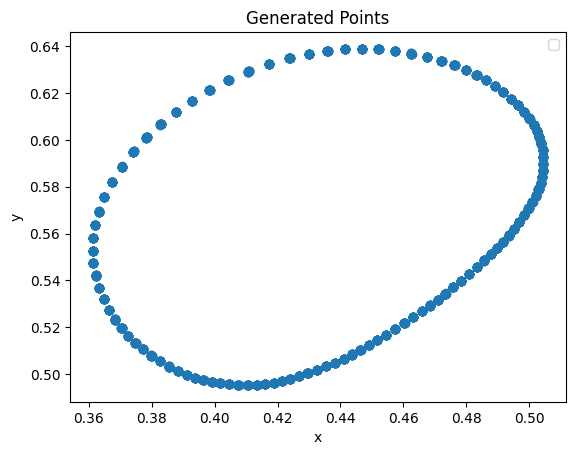

In [7]:
X=points[53]
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Points')
plt.legend()
plt.show()

In [8]:
pairwise_distances = distance_matrix(X, X)
upper_triangle = np.triu(pairwise_distances, k=1).flatten()
dis=np.sort(upper_triangle[upper_triangle!=0])

percentiles = np.arange(10, 100, 10)
max_edge_lengths = np.percentile(dis, percentiles)

In [9]:
max_edge_lengths

array([0.02014868, 0.04010894, 0.05907131, 0.07750524, 0.09399348,
       0.10839478, 0.11863654, 0.13107616, 0.14536872])